# Plot the pearson correlation of the MTS R code and the Python Code

In [17]:
import pandas as pd
import glob
import os
import sys
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
# Load all of the MTS R code results
model_files = glob.glob("/scratch/users/nphill22/projects/corsello_lab/20240313_prism_final_reruns/new_baseline/output/*/Model_table.csv")

# read all model files
model_dfs = []
for f in tqdm(model_files):
    drug_name = os.path.basename(os.path.dirname(f))
    df = pd.read_csv(f)
    df["Drug"] = drug_name
    model_dfs.append(df)

mts_df = pd.concat(model_dfs)
# get only "all" rows
mts_df = mts_df.loc[mts_df["model"] == "all", :]

100%|██████████| 6512/6512 [00:08<00:00, 791.06it/s]


In [14]:
# load all of the baseline python results
baseline_files = glob.glob("/scratch/users/nphill22/projects/corsello_lab/20240313_prism_final_reruns/new_baseline/python_rf_output/*/train_corr.txt")

base_df = []
for f in tqdm(baseline_files):
    drug_name = os.path.basename(os.path.dirname(f))
    with open(f, "r") as f:
        line = f.readline().strip()
        base_df.append({"Drug": drug_name, "train_corr": float(line)})

base_df = pd.DataFrame(base_df)
# rename "train_corr" to "python_baseline"
base_df = base_df.rename(columns={"train_corr": "python_baseline"})

100%|██████████| 6512/6512 [00:02<00:00, 2691.09it/s]


In [15]:
# merge
df = pd.merge(mts_df, base_df, on="Drug", how="inner")

Text(0, 0.5, 'Python Baseline Pearson Score')

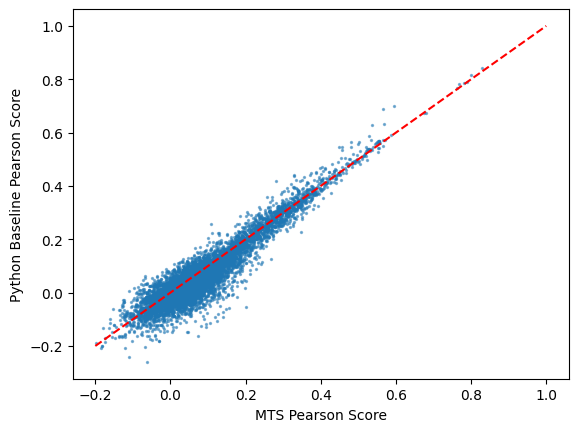

In [26]:
# scatterplot
plt.scatter(df["PearsonScore"], df["python_baseline"], alpha=0.5, s=2) # decrease point size
# plot x = y dotted red line
plt.plot([-.2, 1], [-.2, 1], color="red", linestyle="--")
# add axis labels
plt.xlabel("MTS Pearson Score")
plt.ylabel("Python Baseline Pearson Score")